# XCO2 tutorial Outline

XCO2 Tutorial Outline

POWER POINT PORTION

1. Introduction to XCO2

2. What is XCO2 and history

3. What can XCO2 show and not show

4. Plotted example of XCO2

5. Measurement Approach

6. Spatial and Temporal Resolution for OCO-2 and OCO-3

7.How do we know the data is good?

8.Where to download the data

9. Product and Naming

10.Documentation for data products


## JUPYTER NOTEBOOK PORTION

Before following along, you will need to download software packages for this portion of the training. This is also what you will need in order to work with the data. We will be working in python, please make sure to have python 3 installed as well as Jupyter Notebook installed.

Please be sure to have these libraries downloaded as well – (list libraries)

OCO-2 Data files are large so it will take some time to download!

1.	Show what happens when we open up Jupyter Notebook (we will provide a path for the demo)
2.	Show code for how we pull the data from the data (File name, date and geolocation)
3.	Example one – XY Plot of XCO2 variation over time for a given location
4.	Example two- Show same plot but over several years
5.	Example three- Same location and time but shown over Google Earth for OCO-2 data
6.	Example four- Same location and time but show over Google Earth for OCO-3 data
7.	Example five – GIF showing OCO-3 data on spinning globe



# Jupyter notebook installation guide

From the list of website you can follow instructions to setup Jupyter Notebook:
* https://jupyter.org/install
* https://www.geeksforgeeks.org/how-to-install-jupyter-notebook-in-windows/
* https://test-jupyter.readthedocs.io/en/latest/install.html
 

# Libraries

In [1]:
import netCDF4 # packages to open 'netcdf' file
import numpy as np # numpy and pandas packages to pre-process the dataset
import pandas as pd

import matplotlib.pyplot as plt # to create plots and graphs
from mpl_toolkits.basemap import Basemap # to create geo-spatial map, requires dependencies installation
import plotly.express as px

from bs4 import BeautifulSoup # to load webcontent and retrieve data from link
from IPython.display import display, HTML
from IPython import display
from datetime import datetime

In [2]:
# # install rasterio
# # Install prerequisite packages
# import sys

# # Note you usually need to install gdal outside of Python / pip first. On OSX, brew install gdal
# !{sys.executable} -m pip install rasterio OWSLib GDAL matplotlib netCDF4 numpy

In [3]:
## Libraries
from urllib import request, parse
from http.cookiejar import CookieJar
import getpass
import netrc
import os
import requests
import json
import pprint
# from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import rasterio
#from rasterio.plot import show
import numpy as np
import os
import time
from netCDF4 import Dataset
import netCDF4
from owslib.wms import WebMapService
%matplotlib inline

## 1. Show what happens when we open up Jupyter Notebook (we will provide a path for the demo) 
### Jupyter Notebook Setup

In [4]:
display.IFrame( src="https://test-jupyter.readthedocs.io/en/latest/install.html",\
              width= 600, height= 500)

# 2. Show code for how we pull the data from the data (File name, date and geolocation)

In [5]:
# display.IFrame( src="https://wiki.earthdata.nasa.gov/display/EDSC/How+To%3A+Download+Data+Using+Earthdata+Search#expand-StageforDelivery",
#                width= 600, height= 500)

## website for instructions:
https://wiki.earthdata.nasa.gov/display/EDSC/How+To%3A+Download+Data+Using+Earthdata+Search#expand-StageforDelivery

# Example:
## Reading data from a single file 

In [6]:
import xarray as xr

In [7]:
xco2= netCDF4.Dataset('oco2_LtCO2_211231_B10206Ar_220228193805s.nc4')

In [8]:
xco2.variables.keys()

dict_keys(['sounding_id', 'levels', 'bands', 'vertices', 'footprints', 'date', 'latitude', 'longitude', 'time', 'solar_zenith_angle', 'sensor_zenith_angle', 'xco2_quality_flag', 'xco2_qf_bitflag', 'xco2_qf_simple_bitflag', 'source_files', 'file_index', 'vertex_latitude', 'vertex_longitude', 'xco2', 'xco2_uncertainty', 'xco2_apriori', 'pressure_levels', 'co2_profile_apriori', 'xco2_averaging_kernel', 'pressure_weight'])

## Data Preporcessing
- Converting the original NetCDF file pandas dataframe

In [9]:
df_xco2= pd.DataFrame(columns=["DateTime", "Latitude", "Longitude", "xco2", "xco2_quality_flag"])

### NOTE: sounding_id in DateTime format

In [10]:
df_xco2["xco2"]= xco2["xco2"][:]
df_xco2["DateTime"]= xco2["sounding_id"][:]
df_xco2["Latitude"]= xco2["latitude"][:]
df_xco2["Longitude"]= xco2["longitude"][:]
df_xco2["xco2_quality_flag"]= xco2["xco2_quality_flag"][:]

# Date time

In [11]:
df_xco2

,DateTime,Latitude,Longitude,xco2,xco2_quality_flag
0,2021123100294774,-84.884155,-64.215439,383.213898,1
1,2021123100294775,-84.905594,-64.271126,385.855469,1
2,2021123100294803,-84.865166,-64.364647,384.070648,1
3,2021123100294804,-84.885803,-64.404518,387.916473,1
4,2021123100294833,-84.866142,-64.544434,394.234619,1
...,...,...,...,...,...
202043,2021123123595306,-5.568942,-156.942535,412.849152,1
202044,2021123123595307,-5.579757,-156.941040,413.553925,1
202045,2021123123595308,-5.590607,-156.939621,413.131531,1
202046,2021123123595337,-5.561065,-156.945190,412.371155,1


### DATE TIME re-format from sounding id

In [12]:
def conv_date(d):
    return datetime.strptime(str(d), '%Y%m%d%H%M%S%f')

In [13]:
#Convert soundingID to datetime format
df_xco2["DateTime"]= df_xco2["DateTime"].apply(conv_date)
df_xco2["DateTime"]= pd.to_datetime(df_xco2["DateTime"])

# YEAR and month column
df_xco2["Year"]= df_xco2["DateTime"].dt.year
df_xco2["Month"]= df_xco2["DateTime"].dt.month
df_xco2["Day"]= df_xco2["DateTime"].dt.day

In [14]:
df_xco2.head(5)

,DateTime,Latitude,Longitude,xco2,xco2_quality_flag,Year,Month,Day
0,2021-12-31 00:29:47.740,-84.884155,-64.215439,383.213898,1,2021,12,31
1,2021-12-31 00:29:47.750,-84.905594,-64.271126,385.855469,1,2021,12,31
2,2021-12-31 00:29:48.030,-84.865166,-64.364647,384.070648,1,2021,12,31
3,2021-12-31 00:29:48.040,-84.885803,-64.404518,387.916473,1,2021,12,31
4,2021-12-31 00:29:48.330,-84.866142,-64.544434,394.234619,1,2021,12,31


## Visualizing the dataset
### using different libraries

### 1. Plotly

In [15]:
map_token= 'pk.eyJ1Ijoic2FnYXJsaW1idTAiLCJhIjoiY2t2MXhhMm5mNnE5ajJ3dDl2eDZvNTM2NiJ9.1bwmb8HPgFZWwR8kcO5rOA'

### Setting up Token using Map Box
- Create an acount and generate API Key

https://account.mapbox.com/

### Function to visualize the dataset using Plotly

In [36]:
# # set mapbox access token
# px.set_mapbox_access_token(map_token)

# fig_second= px.scatter_mapbox(df_xco2,
#                       lat= 'Latitude',
#                       lon= 'Longitude',
#                       color= 'xco2',
#                        zoom= 0,
#                       size_max= 0.25,
#                       hover_name='DateTime'
#                       )

# fig_second.update_layout(
# #mapbox_style="stamen-watercolor"
# mapbox_style= "dark"
# )

# fig_second.show()

In [17]:
# Example of visualizing the dataset
# plotly_visual(df_xco2)

# Subsetting by geographic bounding box:
- Bounding box coordinates to cover Australia
- Filtering the latitude and longitude by coordinates
- Example filtering the data by Australia region

## Spatial subsetting on the coordinates:
- Latitude(South: North)
- Longitude(West: East)
- Enter the coordinates     
- Example: Subsetting by Australia region
    - latitude: (-45.75 : -9)
    - longitude: (110 : 156)

In [18]:
# ## Enter the coordinates:
# print("South:\n")
# South= int(input())

In [19]:
def subsetting_coordinates(data, South, North, West, East, zoom = 1):
    
    df_aus_first= data[(data["Latitude"] > South) &(data["Latitude"]< North)]
    df_aus_second= df_aus_first[(df_aus_first["Longitude"] >West) & (df_aus_first["Longitude"] < East)]
    
    # set token
    px.set_mapbox_access_token(map_token)

    fig_second= px.scatter_mapbox(df_aus_second,
                          lat= 'Latitude',
                          lon= 'Longitude',
                          color= 'xco2',
                           zoom= zoom,
                          size_max= 0.25,
                          hover_name='DateTime'
                          )

    fig_second.update_layout(
    #mapbox_style="stamen-watercolor"
    mapbox_style= "dark"
    )

    fig_second.show()

In [20]:
# Australia coordinates: 
# latitude: (-45.75 : -9)
# longitude: (110 : 156)
subsetting_coordinates(df_xco2, -45.75, -9, 110, 156, zoom= 2)

## 2. Basemap

### Guide to download BASEMAP package

* basemap:
Plot on map projections (with coastlines and political boundaries) using matplotlib.

This package depends on the support package basemap-data with the basic basemap data assets, and optionally on the support package basemap-data-hires with high-resolution data assets.

1. Follow the main website instructions to download package
    https://matplotlib.org/basemap/users/installing.html
2. Issues with downloading dependencies:
    https://stackoverflow.com/questions/33020202/how-to-install-matplotlibs-basemap

In [32]:
def global_coverage(data):
# coordinate for global coverage
    lats = np.random.randint(-75, 75, size=20)
    lons = np.random.randint(-179, 179, size=20)

    fig = plt.gcf()
    fig.set_size_inches(9, 6)

    m= Basemap(projection='cyl', resolution='c',
                   llcrnrlat= -90, urcrnrlat=90, llcrnrlon= -180, urcrnrlon= 90)

    m.scatter( data['Longitude'], data['Latitude'], c= data['xco2'], 
              cmap= plt.cm.turbo, 
              s=5,
              marker='*')

    m.bluemarble()   # full scale will be overkill
    m.drawcoastlines(color='white', linewidth=0.2)  # add coastlines


    # Customizing the COLORBAR
    cbar= plt.colorbar(orientation= "horizontal",
                      format= "%.0f",
                      extend="both",
                      shrink= 0.45,
                      aspect= 10,
                      pad= 0.04)

    cbar.set_label(label="XCO2 (parts per million)", size= 15)
    cbar.ax.tick_params(labelsize= 15)

    # ADJUSTT the Color Bar by year
    min_xco2= df_xco2["xco2"].min()
    max_xco2= df_xco2["xco2"].max()
    cbar.set_ticks(np.linspace(min_xco2, max_xco2, 5))
    plt.clim(min_xco2, max_xco2)

    plt.show()

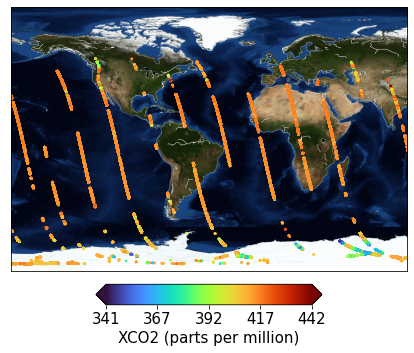

In [33]:
global_coverage(df_xco2)

# Extracting File from Earthdata Login

### Earthdata Login Authentication
An Earthdata Login account is required to access data from NASA EOSDIS. In order to access data from the Harmony API, you will need to create an account in the Earthdata Login UAT environment. Please visit https://uat.urs.earthdata.nasa.gov to set up an account in this test environment. These accounts, as all Earthdata Login accounts, are free to create and only take a moment to set up.

We need some boilerplate up front to log in to Earthdata Login. The function below will allow Python scripts to log into any Earthdata Login application programmatically. To avoid being prompted for credentials every time you run and also allow clients such as curl to log in, you can add the following to a .netrc (_netrc on Windows) file in your home directory:

machine uat.urs.earthdata.nasa.gov
    login <your username>
    password <your password>
Make sure that this file is only readable by the current user or you will receive an error stating "netrc access too permissive."

$ chmod 0600 ~/.netrc

In [22]:
def setup_earthdata_login_auth(endpoint):
    """
    Set up the request library so that it authenticates against the given Earthdata Login
    endpoint and is able to track cookies between requests.  This looks in the .netrc file 
    first and if no credentials are found, it prompts for them.

    Valid endpoints include:
        uat.urs.earthdata.nasa.gov - Earthdata Login UAT (Harmony's current default)
        urs.earthdata.nasa.gov - Earthdata Login production
    """
    try:
        username, _, password = netrc.netrc().authenticators(endpoint)
    except (FileNotFoundError, TypeError):
        # FileNotFound = There's no .netrc file
        # TypeError = The endpoint isn't in the netrc file, causing the above to try unpacking None
        print('Please provide your Earthdata Login credentials to allow data access')
        print('Your credentials will only be passed to %s and will not be exposed in Jupyter' % (endpoint))
        username = input('Username:')
        password = getpass.getpass()

    manager = request.HTTPPasswordMgrWithDefaultRealm()
    manager.add_password(None, endpoint, username, password)
    auth = request.HTTPBasicAuthHandler(manager)

    jar = CookieJar()
    processor = request.HTTPCookieProcessor(jar)
    opener = request.build_opener(auth, processor)
    request.install_opener(opener)

### Now call the above function to setup Earthdata Login for subsequent requests

In [23]:
setup_earthdata_login_auth('uat.urs.earthdata.nasa.gov')

Please provide your Earthdata Login credentials to allow data access
Your credentials will only be passed to uat.urs.earthdata.nasa.gov and will not be exposed in Jupyter
Username:sagarlimbu
········


## Identify a data collection of interest

In [24]:
# platform: OCO2 data
parameters= {
    'platform': '/OCO2_DATA/',
}

# Using the URL for gesdisc which is redirected by EARTHDATA for downloading files
earth_data_url= 'https://oco2.gesdisc.eosdis.nasa.gov/data'+'{platform}'.format(**parameters)

cmr_response= requests.get(earth_data_url)

print("Request response: ", cmr_response)

Request response:  <Response [200]>


### Example: Single file from a downloading source:
https://oco2.gesdisc.eosdis.nasa.gov/data//OCO2_DATA/OCO2_L2_Standard.10r/2021/365/oco2_L2StdGL_39897a_211231_B10206r_220224223435.h5

### Loading the web contents to retrieve the data

### OCO2 data downloads from geodisc

* https://oco2.gesdisc.eosdis.nasa.gov/data//
* platform/Instrument:
    - OCO2_DATA/
* Level:
    - OCO2_L2_Standard.10r
    
* Year:
    - /2021
    - /365/

* Filename:
    - oco2_L2StdGL_39897a_211231_B10206r_220224223435.h5


### Web Scraping tool: BeautifulSoup
- Scrapping the web contents allows us to retrieve the data from the 
    specified webpage
- Getting links for individual files to retrieve data without downloading
- Downloading files take time and resource

In [25]:
# Scrapping the web page content from the source OCO2 data source 'geodisc'
content= BeautifulSoup(cmr_response.text, 'lxml')

In [26]:
type(content)

bs4.BeautifulSoup

### Retrieving links for data:
- Retreiving the links of data
- Individual links reger to version and level standard of the data

In [27]:
for j in content.find_all('a', href=True):
    print(j['href'])

https://www.nasa.gov
https://disc.gsfc.nasa.gov/data-access
https://disc.gsfc.nasa.gov/information/howto?title=How%20to%20Download%20Data%20Files%20from%20HTTPS%20Service%20with%20wget
https://urs.earthdata.nasa.gov/approve_app?client_id=e2WVk8Pw6weeLUKZYOxvTQ
/data/
/data/
OCO2_Att.10/
OCO2_Att.10/
OCO2_Att.10r/
OCO2_Att.10r/
OCO2_Eph.10/
OCO2_Eph.10/
OCO2_Eph.10r/
OCO2_Eph.10r/
OCO2_GEOS_L3CO2_DAY.10r/
OCO2_GEOS_L3CO2_DAY.10r/
OCO2_GEOS_L3CO2_MONTH.10r/
OCO2_GEOS_L3CO2_MONTH.10r/
OCO2_L1B_Calibration.10/
OCO2_L1B_Calibration.10/
OCO2_L1B_Calibration.10r/
OCO2_L1B_Calibration.10r/
OCO2_L1B_Science.10/
OCO2_L1B_Science.10/
OCO2_L1B_Science.10r/
OCO2_L1B_Science.10r/
OCO2_L1aIn_Pixel.10/
OCO2_L1aIn_Pixel.10/
OCO2_L1aIn_Pixel.10r/
OCO2_L1aIn_Pixel.10r/
OCO2_L1aIn_Sample.10/
OCO2_L1aIn_Sample.10/
OCO2_L1aIn_Sample.10r/
OCO2_L1aIn_Sample.10r/
OCO2_L2_ABand.10/
OCO2_L2_ABand.10/
OCO2_L2_ABand.10r/
OCO2_L2_ABand.10r/
OCO2_L2_CO2Prior.10/
OCO2_L2_CO2Prior.10/
OCO2_L2_CO2Prior.10r/
OCO2_L2_CO2

# OC2 Level 2 Standard.10r
- OCO2_L2_Standard.10/

What is granule_ur?

## CMR parameters
- https://wiki.earthdata.nasa.gov/display/CMR/CMR+Client+Partner+User+Guide#CMRClientPartnerUserGuide-Chapter2:GettingStarted
- try:
    * instruement/platform: Eg: platform\[\]=OCO2/OCO3
            - EG: 
                - curl -v -i -H "Echo-Token: 75E5CEBE-6BBB-2FB5-A613-0368A361D0B6" -H "Client-Id: Test_Team"  
                - "https://cmr.uat.earthdata.nasa.gov/search/collections?platform\[\]=AQUA&platform\[\]=AURA&page_size=20&pretty=true"
            
    * polygon
    * bounding_box (lat and lon)
    

## Testing with PLATFORM parameter

* To retreieve data from platform: AQUA
    * EG: Web:
        - https://cmr.uat.earthdata.nasa.gov/search/collections?platform  
    * platform: (It further requests that only a formatted reference list of results that contains 20 references be displayed)
        - [\]=AQUA&page_size=20&pretty=true

In [28]:
params={
    platform: "OCO2"
}

earth_data_url= "https://cmr.uat.earthdata.nasa.gov/search/collections?platform"



NameError: name 'platform' is not defined